In [1]:
import inout as io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Customizing scatterplots

Text(0, 0.5, 'Enriched SARS-CoV-2 Peptides\n(# of peptides)')

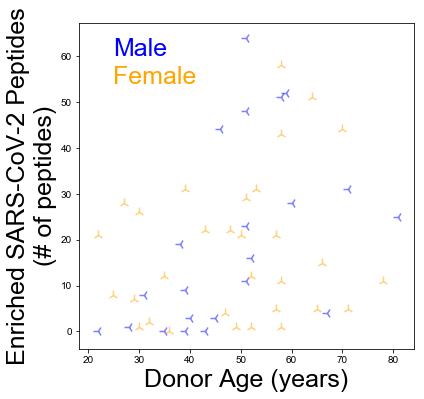

In [51]:
mD = io.fileDictFull("metadata.tsv")

# Convert to floats
mD["Age"] = [float(x) for x in mD['Age']]
mD["SARS2Peps"] = [float(x) for x in mD['SARS2Peps']]
mD["Days from PCR diagnosis"] = [float(x) for x in mD['Days from PCR diagnosis']]

fig, ax = plt.subplots(1,1,figsize=(6,6))

colors = ["blue" if x=="M" else "orange" for x in mD["Sex"]]

mAge = [x for i,x in enumerate(mD["Age"]) if mD["Sex"][i]=="M"]
fAge = [x for i,x in enumerate(mD["Age"]) if mD["Sex"][i]=="F"]

mPeps = [x for i,x in enumerate(mD["SARS2Peps"]) if mD["Sex"][i]=="M"]
fPeps = [x for i,x in enumerate(mD["SARS2Peps"]) if mD["Sex"][i]=="F"]


ax.scatter(mAge, mPeps, c="blue", alpha=0.5, marker="3", s=100, label="Male")
ax.scatter(fAge, fPeps, c="orange", alpha=0.5, marker="2", s=100, label="Female")

#ax.legend(fontsize=20, loc="upper left")
ax.text(25,60, "Male", color="blue", fontsize=25)
ax.text(25,54, "Female", color="orange", fontsize=25)

ax.set_xlabel("Donor Age (years)", fontsize=25)
ax.set_ylabel("Enriched SARS-CoV-2 Peptides\n(# of peptides)", fontsize=25)

# Color maps

Text(0, 0.5, 'Enriched SARS-CoV-2 Peptides\n(# of peptides)')

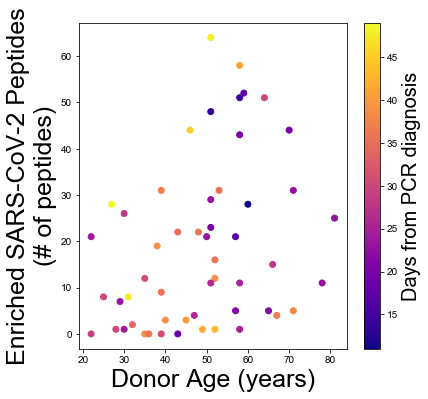

In [58]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

sp = ax.scatter(mD["Age"], mD["SARS2Peps"], c=mD["Days from PCR diagnosis"], cmap="plasma")
#ax.scatter(mD["Age"], mD["SARS2Peps"], c=mD["Days from PCR diagnosis"], cmap="plasma")

cbar = fig.colorbar(sp)
cbar.set_label("Days from PCR diagnosis", fontsize=20)

ax.set_xlabel("Donor Age (years)", fontsize=25)
ax.set_ylabel("Enriched SARS-CoV-2 Peptides\n(# of peptides)", fontsize=25)

# Scatter plot vs. Heat map

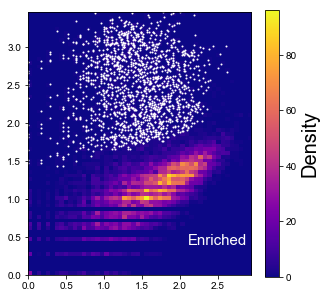

In [83]:
pD = io.fileDictFull("pepCountData.tsv")

# Convert to floats
pD["ControlCount"] = [float(x) for x in pD["ControlCount"]]
pD["SampleCount"] = [float(x) for x in pD["SampleCount"]]
pD["SampleZ"] = [float(x) for x in pD["SampleZ"]]

x = np.log10(np.array(pD["ControlCount"])+1)
y = np.log10(np.array(pD["SampleCount"])+1)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(50, 70))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

fig,ax = plt.subplots(1,1,figsize=(5,7))
#ax.scatter(x,y, s=2)
hp = ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='plasma')

zThresh=10
pep2plot = [i for i,v in enumerate(pD["SampleZ"]) if v>=zThresh]
xZ = [x[i] for i in pep2plot]
yZ = [y[i] for i in pep2plot]
ax.scatter(xZ, yZ, c="w", s=1)

ax.set_xlim(extent[:2])
ax.set_ylim(extent[-2:])

ax.text(2.1, 0.4, "Enriched", color="w", fontsize=15)

cbar = fig.colorbar(hp, shrink=0.7)
cbar.set_label('Density', fontsize=20)

In [79]:
print(len(pep2plot), len(xZ), len(yZ))

1528 1528 1528


# Map

In [95]:
points={}

with open('SLE_district_centroids.txt', 'r') as fin:
    for line in fin:
        location, lon, lat = line.strip("\n").split("\t")
        points[location] = [float(lon), float(lat)]

(-13.7, -10.0, 6.6, 10.2)

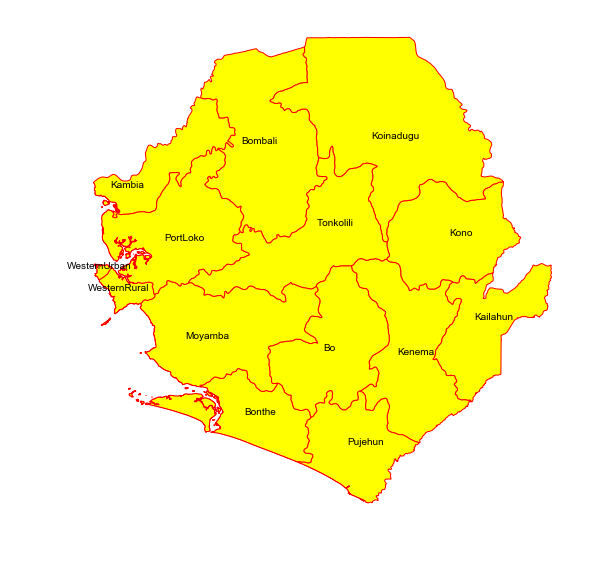

In [97]:
json = pd.read_json(open("SLE_v3.geojson", "r"))

fig,ax = plt.subplots(figsize=(10,10))

for loc in json['features']:
    pc = np.array(loc['geometry']['coordinates'])
    
    location = loc["properties"]['location']
    
    if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
        for part in pc:
            for coords in part:
                poly=plt.Polygon(coords, facecolor="yellow", edgecolor="red")
                ax.add_patch(poly)
        ax.text(points[location][0], points[location][1], location, ha="center")

    if loc['geometry']['type']=='Polygon': ## multiple parts detected
        for coords in pc:
            poly=plt.Polygon(coords, facecolor="yellow", edgecolor="red")
            ax.add_patch(poly)
        ax.text(points[location][0], points[location][1], location, ha="center")

ax.set_ylim([6.6,10.2])
ax.set_xlim([-13.7,-10])

plt.axis('off')

In [86]:
json['features']

0     {'type': 'Feature', 'id': 66, 'properties': {'...
1     {'type': 'Feature', 'id': 67, 'properties': {'...
2     {'type': 'Feature', 'id': 68, 'properties': {'...
3     {'type': 'Feature', 'id': 69, 'properties': {'...
4     {'type': 'Feature', 'id': 70, 'properties': {'...
5     {'type': 'Feature', 'id': 71, 'properties': {'...
6     {'type': 'Feature', 'id': 72, 'properties': {'...
7     {'type': 'Feature', 'id': 73, 'properties': {'...
8     {'type': 'Feature', 'id': 74, 'properties': {'...
9     {'type': 'Feature', 'id': 75, 'properties': {'...
10    {'type': 'Feature', 'id': 76, 'properties': {'...
11    {'type': 'Feature', 'id': 77, 'properties': {'...
12    {'type': 'Feature', 'id': 78, 'properties': {'...
13    {'type': 'Feature', 'id': 79, 'properties': {'...
Name: features, dtype: object